<a href="https://colab.research.google.com/github/faraz7321/DFKI_test/blob/master/dfki_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from sys import platform
print(platform)

linux


In [ ]:
!pip install apriltag
import apriltag

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import cv2

In [ ]:
#Load the image 
from google.colab import files 
uploaded = files.upload()
#files.view()

Saving image.png to image (7).png


In [ ]:
# load the input image and convert it to grayscale

image = cv2.imread('image.png')
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [ ]:
# define the AprilTags detector options and then detect the AprilTags
# in the input image
options = apriltag.DetectorOptions(families="tag36h11")
detector = apriltag.Detector(options)
tags = detector.detect(gray)
print("{} AprilTags detected".format(len(tags)))

3 AprilTags detected


In [ ]:
print(tags)

[Detection(tag_family=b'tag36h11', tag_id=15, hamming=0, goodness=0.0, decision_margin=17.463890075683594, homography=array([[ 6.26044902e-01,  3.23054255e-02,  1.81329461e+01],
       [-8.10964315e-02,  7.29130476e-01,  1.61598796e+01],
       [-1.12018555e-04,  4.01194023e-05,  2.36139782e-02]]), center=array([767.8903539, 684.3353298]), corners=array([[737.76434326, 654.89849854],
       [798.17633057, 654.23907471],
       [798.20037842, 713.95196533],
       [737.99212646, 714.04626465]])), Detection(tag_family=b'tag36h11', tag_id=22, hamming=0, goodness=0.0, decision_margin=20.985185623168945, homography=array([[ 7.11052098e-01,  5.27619833e-03,  4.75280085e+00],
       [-4.71645550e-02,  6.86948710e-01,  8.68958022e-01],
       [-5.89373199e-06, -5.93194987e-05,  6.29049140e-03]]), center=array([755.55319126, 138.13833728]), corners=array([[635.09442139,  36.05797958],
       [860.44262695,  21.25575638],
       [878.53570557, 242.35739136],
       [648.86682129, 257.02331543]])

In [ ]:
# we can see the detected tag family and ID it decoded

In [ ]:
# loop over the AprilTag detection results
# add tags in image
for tag in tags:

    # draw border lines
    for idx in range(len(tag.corners)):
        cv2.line(image, tuple(
            tag.corners[idx-1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    # add text in image
    cv2.putText(image, "Tag " + str(tag.tag_id),
                org=(tag.center[0].astype(int),
                     tag.center[1].astype(int)),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.5,
                color=(0, 255, 0))

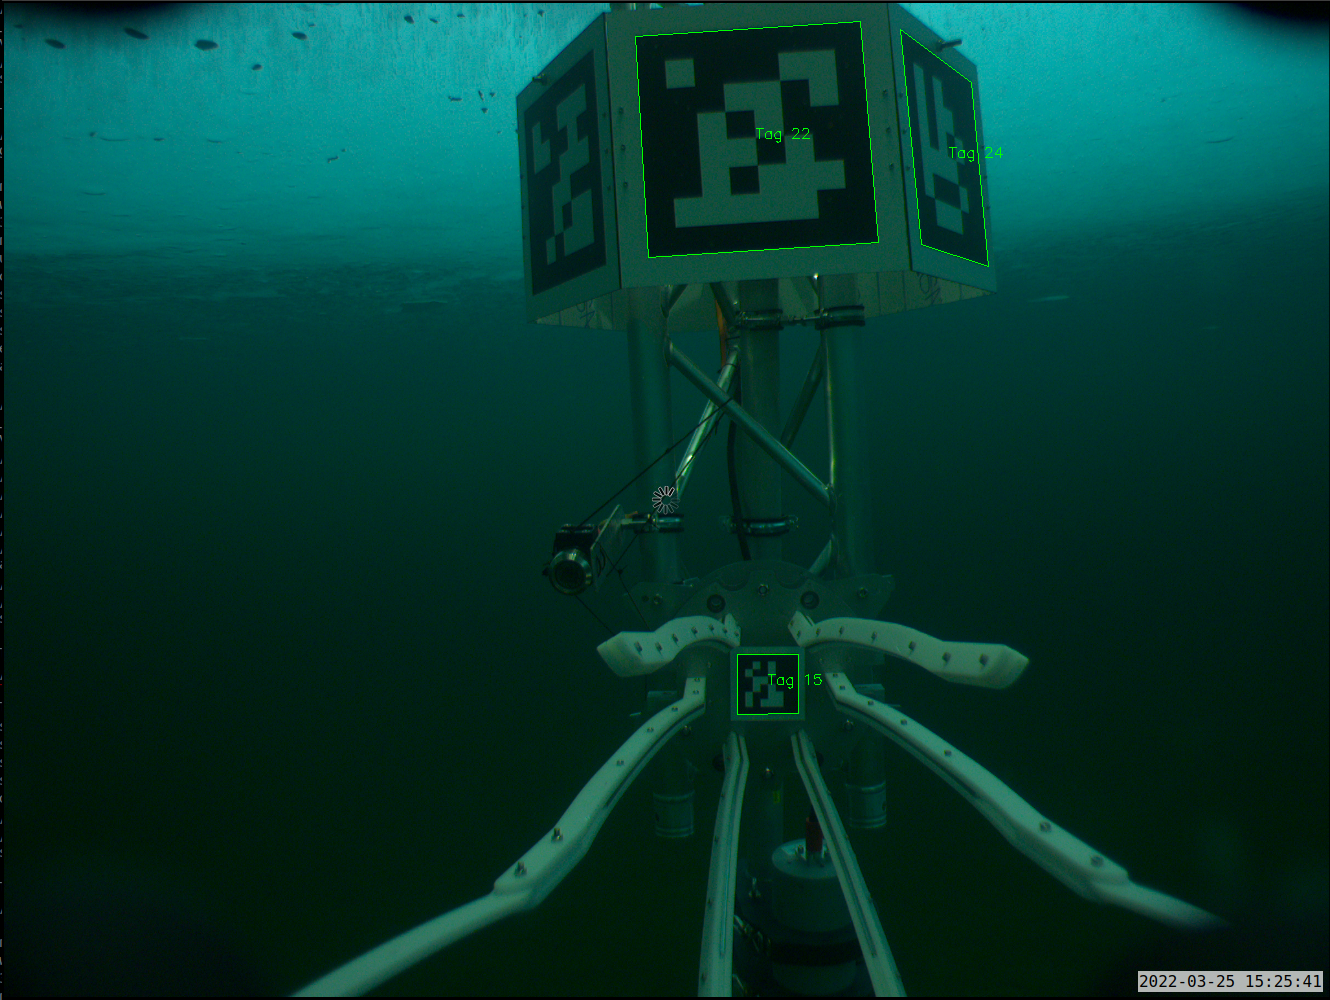

In [ ]:
# show the output image after AprilTag detection
# using cv2_imshow A replacement for cv2.imshow() for use in Jupyter notebooks.
from google.colab.patches import cv2_imshow
cv2_imshow(image)
#cv2.waitKey(0)